## Ejemplos de inversión Geofísica

En este notebook veremos un ejemplo de inversión geofísica
la "tomografía acustica". Este ejemplo nos servirá para 
explorar los conceptos de problema indeterminado y algunas 
de las estrategias que pueden usarse para solucionar la 
inderterminación del problema.

In [8]:
# Importamos las librerias que vamos a usar
import numpy as np
import matplotlib.pyplot as plt

## Tomografía acustica 2D

El tiempo de viaje de las ondas acústicas (flechas en la figura) a través de las filas y columnas de una matriz cuadrada de ladrillos se mide con la fuente acústica "S" y el receptor "R" ubicados en los bordes del cuadrado. El problema inverso consiste en inferir las propiedades acústicas de los ladrillos, representadas aquí por los colores. Aunque el patrón general es variable espacialmente, se asume que los ladrillos individuales son homogéneos en su interior.

<img src="images/tomo_acustica.png">

Ejemplo 3: La tomografía acustica.

Asumiremos que todos los ladrillos tienen el mismo ancho y largo con la medida h = 1.

In [9]:
# largo y ancho de los ladrillos
h = 1

# Caso de tomografía acustica
N = 8    # número de observaciones
M = 16   # número de parámetros del modelo

# Construimos la matriz G
G = np.zeros((N,M), dtype=float)

# formamos la matriz kernel
for i in range(4):
    for j in range(4):
        # medidas en las lineas
            k = (i)*4 + j
            G[i][k] = h
            # medidas en las columnas
            k = (j)*4 + i
            G[i+4][k] = h
print(G)

[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [10]:
# Demos valores de velocidad de onda acustica a cada ladrillo
m = np.asarray([1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 5, 5, 5, 5])
# Calculemos la "lentitud" = 1 / velocidad
m = 1 / m
# Vector transpuesto para hacer   d = G m
# recuerden que G es 8x16 y m es 16x1 parámetros, d es 8x1 observaciones
m = m.T

# Medidas reales sin ruido
d = np.matmul(G, m)
print('Tiempos de viaje sin ruido:\n', d)
# Datos con ruido
d_con_ruido = np.zeros(len(d), dtype=float)

# Agregaremos ruido para crear medidas más reales
for i in range(len(d)):
    d_con_ruido[i] = d[i] + np.random.normal(0,0.01)  # 0.01 segundo max desviación
print('Tiempos de viaje con ruido:\n', d_con_ruido)


Tiempos de viaje sin ruido:
 [4.  3.  2.  0.8 2.2 2.2 2.7 2.7]
Tiempos de viaje con ruido:
 [3.99813781 2.99392309 1.990466   0.79546765 2.19529014 2.21850532
 2.70836988 2.72137463]


## Solución del problema por mínimos cuadrados

Recordemos que el sistema
d = Gm
se puede solucionar con los siguiente pasos

G' d = G'G m

(G'G)^-1 G' d = (G'G)^-1 (G'G) m

(G'G)^-1 G' d = m_est

Entonces calculemos lo necesario para resolver este problema

In [11]:
# Calculamos G^T G
GT = G.T
GTd = np.matmul(GT, d_con_ruido)
GTG = np.matmul(GT, G)
GTGinv = np.linalg.inv(GTG)
m_est = np.matmul(GTGinv, GTd)
m_est_no_amor = m_est
print('m_real    m_est')
for i in range(M):
    print(m[i], '     ', m_est[i])

print('\n')
print('Datos observados VS sintéticos \n')
d_pred = np.matmul(G, m_est)
print('d_obs                   d_pred')
for i in range(N):
    print(d_con_ruido[i], '     ', d_pred[i])


m_real    m_est
1.0       64.0
1.0       -24.0
1.0       -13.0
1.0       -8.0
0.5       -76.0
0.5       -14.5
1.0       5.0
1.0       16.0
0.5       -21.0
0.5       -2.0
0.5       7.0
0.5       0.5
0.2       10.0
0.2       4.0
0.2       -8.0
0.2       0.0


Datos observados VS sintéticos 

d_obs                   d_pred
3.9981378128713465       19.0
2.9939230892713216       -69.5
1.9904660032183619       -15.5
0.7954676469579048       6.0
2.1952901410833023       -23.0
2.218505322292151       -36.5
2.7083698839012786       -9.0
2.7213746279539595       8.5


¿Qué sucedió? 

¿Por qué no resolvimos el problema como en el caso anterior?

¿Alguna idea?

Problemas Indeterminados:
Cuando la ecuación d = Gm no proporciona suficiente información para determinar de manera única todos los parámetros del modelo, se dice que el problema es indeterminado. Como vimos anteriormente.

Por ejemplo, esto puede ocurrir si hay varias soluciones que tienen un error de predicción igual a cero. A partir del álgebra lineal elemental, sabemos que los problemas indeterminados ocurren cuando hay más incógnitas que datos, es decir, cuando M > N. 

En este caso M = 16 y N = 8. Por lo tanto M > N

Sin embargo, debemos tener en cuenta que no hay ninguna razón especial por la cual el error de predicción deba ser cero para un problema indeterminado. Frecuentemente, los datos determinan de manera única algunos de los parámetros del modelo pero no otros. Por ejemplo, consideremos el experimento acústico. Dado que no se realizan mediciones de la lentitud acústica en el segundo ladrillo dado el primer rayo, es evidente que este parámetro del modelo está completamente sin restricciones por los datos del primer rayo.

Si uno intentara resolver este problema con mínimos cuadrados, encontraría que el término $(G T G)^-1$ ya que el núcleo de datos tiene una estructura muy deficiente. Aunque este es un caso bastante trivial en el que solo algunos de los parámetros del modelo son indeterminados, en experimentos realistas, el problema surge en formas más sutiles.

## Aproximación por mínimos cuadrados - problema de optimización

La mayoría de los problemas inversos que surgen en la práctica no son ni completamente sobredeterminados ni completamente indeterminados. Por ejemplo, en el problema de tomografía de rayos, pueden haber ladrillos por los cuales pasan varios rayos. La opacidad de rayos en algunos ladrillos está claramente sobredeterminada. Por otro lado, puede haber ladrillos que han sido completamente omitidos. Estos ladrillos son completamente indeterminados. También puede haber cajas que no pueden ser resueltas individualmente porque cada rayo que atraviesa uno también atraviesa la misma distancia del otro. Estos ladrillos también están indeterminados, ya que solo se determina su opacidad promedio.

Idealmente, nos gustaría clasificar los parámetros del modelo desconocidos en dos grupos: aquellos que están sobredeterminados y aquellos que están indeterminados. Para hacer esto, necesitamos subdividir el problema:

<img src="images/solucion_2.png">

In [12]:
GGT = np.matmul(G, GT)
GGTinv = np.linalg.inv(GGT)
m_est = np.matmul(np.matmul(GT, GGTinv), d_con_ruido)
m_est_optim = m_est
print('m_real    m_est')
for i in range(M):
    print(m[i], '     ', m_est[i])

print('\n')
print('Datos observados VS sintéticos \n')
d_pred = np.matmul(G, m_est)
print('d_obs                   d_pred')
for i in range(N):
    print(d_con_ruido[i], '     ', d_pred[i])

m_real    m_est
1.0       1.2081851599944171
1.0       1.144562707231519
1.0       1.006102038075221
1.0       1.0011600462244217
0.5       0.957131479094411
0.5       0.8935090263315129
1.0       0.7550483571752149
1.0       0.7501063653244155
0.5       0.7062672075811711
0.5       0.6426447548182728
0.5       0.504184085661975
0.5       0.49924209381117557
0.2       0.40751761851605683
0.2       0.34389516575315854
0.2       0.2054344965968607
0.2       0.20049250474606128


Datos observados VS sintéticos 

d_obs                   d_pred
3.9981378128713465       4.360009951525578
2.9939230892713216       3.3557952279255545
1.9904660032183619       2.3523381418725946
0.7954676469579048       1.1573397856121375
2.1952901410833023       3.279101465186056
2.218505322292151       3.024611654134463
2.7083698839012786       2.470768977509272
2.7213746279539595       2.451001010106074


## Aproximación - solución por partes

<img src="images/solucion_dividida.png">

## Aproximación mínimos cuadrados amortiguados

<img src="images/solucion_amortiguada.png">

In [13]:
# Formamos la matriz de identidad
I = np.zeros((M,M), dtype=float)
for i in range(M):
    I[i][i] = 1.

# epsilon
e = 0.001

# Calculamos G^T G
GT = G.T
GTd = np.matmul(GT, d_con_ruido)
GTG = np.matmul(GT, G)
e2I = e**2.*I
GTGe2I = GTG + e2I
GTGe2Iinv = np.linalg.inv(GTGe2I)
m_est = np.matmul(GTGe2Iinv, GTd)
m_est_amor = m_est
print('m_real    m_est')
for i in range(M):
    print(m[i], '     ', m_est[i])

print('\n')
print('Datos observados VS sintéticos \n')
d_pred = np.matmul(G, m_est)
print('d_obs                   d_pred')
for i in range(N):
    print(d_con_ruido[i], '     ', d_pred[i])


m_real    m_est
1.0       0.9351838754955679
1.0       0.9409876721911132
1.0       1.0634537810692564
1.0       1.0667049676412717
0.5       0.6841302603133954
0.5       0.6899340522359125
1.0       0.8124001625692472
1.0       0.8156513477442786
0.5       0.43326605125912465
0.5       0.43906984449131414
0.5       0.5615359546500258
0.5       0.5647871390392538
0.2       0.13451653555966914
0.2       0.14032033050898463
0.2       0.2627864396199584
0.2       0.26603762432932854


Datos observados VS sintéticos 

d_obs                   d_pred
3.9981378128713465       4.006330296397209
2.9939230892713216       3.0021158228628337
1.9904660032183619       1.9986589894397184
0.7954676469579048       0.8036609300179407
2.1952901410833023       2.187096722627757
2.218505322292151       2.2103118994273245
2.7083698839012786       2.7001763379084878
2.7213746279539595       2.7131810787541326


## Comparación de modelos resultantes

Es necesario tener herramientas para estimar que 
tan bueno ha sido un modelo en ajustar tanto los 
datos como los parámetros del modelo (si estos se conocen).

Estas herramientas deben ser objetivas y no depender
de la subjetividad del analista.

Algunas de las más famosas normas para estimar el 
ajuste a los datos y modelo son la norma L1 y la norma L2.

<img src="images/normas.png" width="70%">



/tmp/ipykernel_19189/3838932545.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  Model_est_0[i][j] = 1/m_est_no_amor[k]
/tmp/ipykernel_19189/3838932545.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


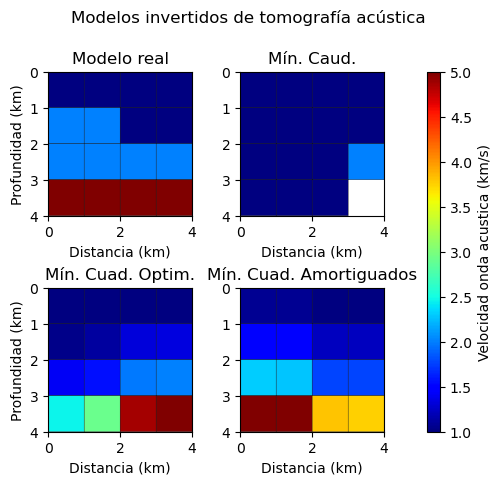

In [18]:
Model = np.zeros((4,4), dtype=float)
Model_est_0 = np.zeros((4,4), dtype=float)
Model_est_1 = np.zeros((4,4), dtype=float)
Model_est_2 = np.zeros((4,4), dtype=float)

k = 0
for i in range(4):
    for j in range(4):
        Model[i][j] = 1/m[k]
        Model_est_0[i][j] = 1/m_est_no_amor[k]
        Model_est_1[i][j] = 1/m_est_optim[k]
        Model_est_2[i][j] = 1/m_est_amor[k]
        k += 1

# Color map para ser utilizado
cmap = plt.cm.get_cmap('jet')

        
fig1 = plt.figure(1)
fig1.suptitle('Modelos invertidos de tomografía acústica')
ax1 = fig1.add_subplot(2, 2, 1)
ax1.set_position([0.15, 0.55, 0.3, 0.3])
s1 = ax1.pcolor(Model, clim=([1, 5]), edgecolor='black', cmap=cmap)
ax1.set_title('Modelo real')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_aspect('equal')
ax1.set_ylabel('Profundidad (km)')
ax1.set_xlabel('Distancia (km)')

ax2 = fig1.add_subplot(2, 2, 2)
ax2.set_position([0.45, 0.55, 0.3, 0.3])
s2 = ax2.pcolor(Model_est_0, clim=([1, 5]), edgecolor='black', cmap=cmap)
ax2.set_title('Mín. Caud.')
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_aspect('equal')
ax2.set_xlabel('Distancia (km)')

ax3 = fig1.add_subplot(2, 2, 3)
ax3.set_position([0.15, 0.1, 0.3, 0.3])
s3 = ax3.pcolor(Model_est_1, clim=([1, 5]), edgecolor='black', cmap=cmap)
ax3.set_title('Mín. Cuad. Optim.')
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_aspect('equal')
ax3.set_xlabel('Distancia (km)')
ax3.set_ylabel('Profundidad (km)')

ax4 = fig1.add_subplot(2, 2, 4)
ax4.set_position([0.45, 0.1, 0.3, 0.3])
s4 = ax4.pcolor(Model_est_2, clim=([1, 5]), edgecolor='black', cmap=cmap)
ax4.set_title('Mín. Cuad. Amortiguados')
ax4.set_ylim(ax4.get_ylim()[::-1])
ax4.set_aspect('equal')
ax4.set_xlabel('Distancia (km)')

# Colorbar
cbaxes = fig1.add_axes([0.78, 0.1, 0.02, 0.75]) 
cb = fig1.colorbar(s1, ax=ax3, cax=cbaxes, orientation='vertical')
cb.set_label('Velocidad onda acustica (km/s)')


In [4]:
def tiempo_de_viaje(xf, zf, xr, zr, vel):
    tiempo = []
    for i in range(len(xr)):
        distancia = np.sqrt((xr[i] - xf)**2. + (zr[i] - zf)**2.)
        tiempo.append(distancia / vel)
    tiempo = np.asarray(tiempo)
    return tiempo

def ajuste_norma_l2(t_obs, t_cal):
    delta_time = []
    for i in range(len(t_obs)):
        delta_time.append(t_obs[i] - t_cal[i])
    delta_time = np.asarray(delta_time)
    ajuste = (1/2) * (np.matmul(delta_time, delta_time.T))
    return ajuste

In [6]:
# Coordenadas de la fuente
xf = 0    #km
zf = 10   #km

#Coordenadas de los receptores
xr = [0, 0]
zr = [0, 1]

#Velocidad del medio
vel = 5    #km/s

t_obs = [2, 9/5]

xf = np.linspace(-10, 10, 3)
zf = np.linspace(12, 8, 3)

cost_map = np.zeros((len(zf), len(xf)), dtype=float)

costo = []
i = 0
k = 0
for x in xf:
    j = 0
    for z in zf:
        time = tiempo_de_viaje(x, z, xr, zr, vel)
        c = ajuste_norma_l2(t_obs, time)
        costo.append(c)
        if k == 1300:
            print(c,x,z)
        k+=1
        cost_map[j][i] = c
        j += 1
    i += 1

/tmp/ipykernel_9987/2090433904.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')


3 3 9


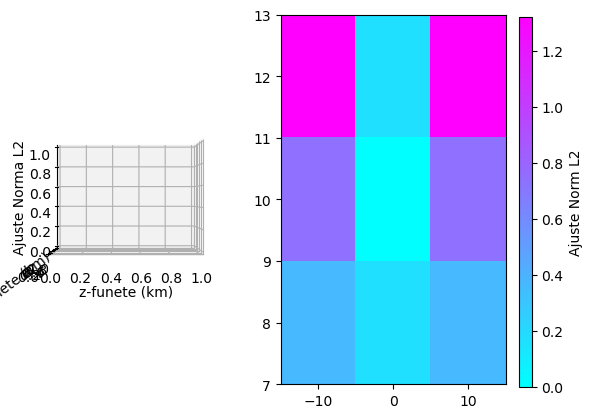

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
k = 0
for x in xf:
    for z in zf:
        #ax1.scatter(z, x, costo[k], s=0.5, c='black')
        k += 1
ax1.set_zlabel('Ajuste Norma L2')
ax1.set_xlabel('z-funete (km)')
ax1.set_ylabel('x-funete (km)')
ax1.view_init(elev=0, azim=-90, roll=0)

cmap = plt.cm.get_cmap('cool')
ax2 = fig1.add_subplot(1, 2, 2)
s1 = ax2.pcolor(xf, zf, cost_map, cmap=cmap)
cbaxes = fig1.add_axes([0.92, 0.105, 0.02, 0.77]) 
cb = fig1.colorbar(s1, ax=ax1, cax=cbaxes, orientation='vertical')
cb.set_label('Ajuste Norm L2')


print(len(xf),len(zf),len(costo))